# EDA on Fifa Dataset 

Importing all the necessary packages for the EDA.

In [116]:
#Data Analysis
import pandas as pd 
import numpy as np 

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot

%matplotlib inline

In [117]:
import warnings
warnings.simplefilter(action ='ignore', category=Warning)

Importing the dataset available on Kaggle which contains 17,000+ players featuring in FIFA18, each with more than 70 attributes, scraped from the website SoFiFa.

In [118]:
df = pd.read_csv("fifa21_raw_data.csv")

# No. of Rows and Columns

In [119]:
df.shape

(18979, 77)

Since, We know that our dataset contains 77 columns.so we need to know the names of the columns, on the basis of which we can say which column is useful for us and which we need to eliminate.

In [120]:
df.columns

Index(['photoUrl', 'LongName', 'playerUrl', 'Nationality', 'Positions', 'Name',
       'Age', '↓OVA', 'POT', 'Team & Contract', 'ID', 'Height', 'Weight',
       'foot', 'BOV', 'BP', 'Growth', 'Joined', 'Loan Date End', 'Value',
       'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Hits

# Feature Selection

In [121]:
idf = df[["Name","Age","Nationality","Positions","↓OVA","POT","Team & Contract","Height","Weight","Jumping",
          "Attacking","Stamina","Goalkeeping","Value","Wage","Heading Accuracy","Ball Control","foot"]]

In [122]:
idf

,Name,Age,Nationality,Positions,↓OVA,POT,Team & Contract,Height,Weight,Jumping,Attacking,Stamina,Goalkeeping,Value,Wage,Heading Accuracy,Ball Control,foot
0,L. Messi,33,Argentina,RW ST CF,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,"5'7""",159lbs,68,429,72,54,€67.5M,€560K,70,96,Left
1,Cristiano Ronaldo,35,Portugal,ST LW,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,"6'2""",183lbs,95,437,84,58,€46M,€220K,90,92,Right
2,J. Oblak,27,Slovenia,GK,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,"6'2""",192lbs,78,95,41,437,€75M,€125K,15,30,Right
3,K. De Bruyne,29,Belgium,CAM CM,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,"5'11""",154lbs,63,407,89,56,€87M,€370K,55,92,Right
4,Neymar Jr,28,Brazil,LW CAM,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,"5'9""",150lbs,62,408,81,59,€90M,€270K,62,95,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,Zhang Mengxuan,21,China PR,CB,47,52,\n\n\n\nChongqing Dangdai Lifan FC SWM Team\n2...,"5'10""",154lbs,65,141,55,53,€35K,€1K,45,24,Right
18975,V. Da Silva,17,England,ST,47,67,\n\n\n\nOldham Athletic\n2020 ~ 2021\n\n,"5'7""",128lbs,50,202,55,48,€60K,€500,36,44,Right
18976,Xia Ao,21,China PR,CB,47,55,\n\n\n\nWuhan Zall\n2018 ~ 2022\n\n,"5'10""",146lbs,57,145,54,45,€40K,€1K,43,42,Right
18977,B. Hough,17,England,CM,47,67,\n\n\n\nOldham Athletic\n2020 ~ 2021\n\n,"5'9""",143lbs,58,211,43,45,€60K,€500,40,48,Right


In [123]:
idf.dtypes

Name                object
Age                  int64
Nationality         object
Positions           object
↓OVA                 int64
POT                  int64
Team & Contract     object
Height              object
Weight              object
Jumping              int64
Attacking            int64
Stamina              int64
Goalkeeping          int64
Value               object
Wage                object
Heading Accuracy     int64
Ball Control         int64
foot                object
dtype: object

In [124]:
idf.isnull().sum()

Name                0
Age                 0
Nationality         0
Positions           0
↓OVA                0
POT                 0
Team & Contract     0
Height              0
Weight              0
Jumping             0
Attacking           0
Stamina             0
Goalkeeping         0
Value               0
Wage                0
Heading Accuracy    0
Ball Control        0
foot                0
dtype: int64

In [125]:
#Creating the Prefered positions columns
idf['Prefered Positions'] = idf.Positions.str.split().str.get(0)

In [126]:
#Processing the postions columns
player_position = {"Gkkk":"GK",
                   "LWB":"DEF","LB":"DEF","CB":"DEF","RB":"DEF","RWB":"DEF",
                   "LW":"MID","LM":"MID","CDM":"MID","CM":"MID","CAM":"MID","RW":"MID","RW":"MID",
                   "CF":"FWD","ST":"FWD"
                  } 
idf['Position'] = idf["Prefered Positions"].replace(player_position, regex=True)

In [127]:
#Replacing ↓OVA	 to Overall
idf = idf.rename(columns = {"↓OVA" :"Overall"})

##### Renaming the Pot to Potential

In [128]:
idf = idf.rename(columns = {"POT":"Potential"})

# Data Transformation

### Creating New Column "Club" from "Team & Contract"

In [129]:
#Preprocessing the Team & Contract column and renaming it to Club
idf["Team & Contract"]

0                    \n\n\n\nFC Barcelona\n2004 ~ 2021\n\n
1                        \n\n\n\nJuventus\n2018 ~ 2022\n\n
2                 \n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n
3                 \n\n\n\nManchester City\n2015 ~ 2023\n\n
4             \n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n
                               ...                        
18974    \n\n\n\nChongqing Dangdai Lifan FC SWM Team\n2...
18975             \n\n\n\nOldham Athletic\n2020 ~ 2021\n\n
18976                  \n\n\n\nWuhan Zall\n2018 ~ 2022\n\n
18977             \n\n\n\nOldham Athletic\n2020 ~ 2021\n\n
18978                \n\n\n\nClub Bolívar\n2020 ~ 2024\n\n
Name: Team & Contract, Length: 18979, dtype: object

In [130]:
idf['Club'] = idf['Team & Contract'].str.rstrip('\n')
idf['Club'] = idf['Club'].str.lstrip('\n')
idf['Club'] = idf['Club'].str.replace('\d+','')
idf['Club'] = idf['Club'].str.strip('\n ~')

## Scaling
### Converting the Height from feet and inches into cm
    As the columns contains the data in numbers and symbol format, which could be easily understandable by humans, 
    but not by the program. So we need to rename those symbols and also convert the values into cm from inches.

In [131]:
idf['temp1'] = idf["Height"].str.get(0)
idf['temp2'] = idf["Height"].str.get(2) + idf["Height"].str.get(3)


idf['temp2'] = idf['temp2'].str.strip('"')

idf['temp1'] = idf['temp1'].astype(float)
idf['temp1'] = idf["temp1"] * 30.48

idf["temp2"] = idf["temp2"].astype(float)
idf['temp2'] = idf["temp2"] * 2.54


idf["Height"] = idf["temp1"] + idf["temp2"]

In [132]:
idf["Height"]

0        170.18
1        187.96
2        187.96
3        180.34
4        175.26
          ...  
18974    177.80
18975    170.18
18976    177.80
18977    175.26
18978    175.26
Name: Height, Length: 18979, dtype: float64

##  Preprocessing the Weight Column

In [133]:
idf["Weight (kg)"] = idf["Weight"].str[:3].astype(float)/2.20462

## Preprocessing the Value column

As from the data we can see, the value column contain symbols and also some players are valued in Million while, some are valued in thousands. So we need to scale the value in, one for all the players. We'll be valuing al players in M.

In [134]:
def Val_split(x):
    try:
        if 'M' in x :
            return float(x.split("M")[0][1:])
        elif 'K' in x :
            return float(x.split("K")[0][1:])/1000
    except :
        return 0
    
idf["Value"] = idf["Value"].apply(lambda x : Val_split(x))
idf =idf.rename(columns ={"Value": "Value in M"})

##  Preprocessing the Wage column

similar as the value column

In [135]:
def Wage_split(x):
    try:
        if 'K' in x :
            return float(x.split("K")[0][1:])
        elif "" in x:
            return 0.5
    except :
        return 0
    
idf["Wage in K"] = idf["Wage"].apply(lambda x : Wage_split(x))

In [136]:
idf["Wage in K"]

0        560.0
1        220.0
2        125.0
3        370.0
4        270.0
         ...  
18974      1.0
18975      0.5
18976      1.0
18977      0.5
18978      0.5
Name: Wage in K, Length: 18979, dtype: float64

In [137]:
idf .columns

Index(['Name', 'Age', 'Nationality', 'Positions', 'Overall', 'Potential',
       'Team & Contract', 'Height', 'Weight', 'Jumping', 'Attacking',
       'Stamina', 'Goalkeeping', 'Value in M', 'Wage', 'Heading Accuracy',
       'Ball Control', 'foot', 'Prefered Positions', 'Position', 'Club',
       'temp1', 'temp2', 'Weight (kg)', 'Wage in K'],
      dtype='object')

## Missing Values Detection
Checking if the dataset contains any null value or not.

In [138]:
idf.isna().sum()

Name                    0
Age                     0
Nationality             0
Positions               0
Overall                 0
Potential               0
Team & Contract         0
Height                  0
Weight                  0
Jumping                 0
Attacking               0
Stamina                 0
Goalkeeping             0
Value in M            249
Wage                    0
Heading Accuracy        0
Ball Control            0
foot                    0
Prefered Positions      0
Position                0
Club                    0
temp1                   0
temp2                   0
Weight (kg)             0
Wage in K               0
dtype: int64

As we can see Value in M column contains  many null value.So we need to replace the null value by the mean.

In [139]:
# Finding the mean of the value column
mean_val =idf["Value in M"].mean()

# Replace NaNs in column with the mean of values in the same column
idf["Value in M"].fillna(value =mean_val, inplace = True)

##  DATA REDUCTION

    The dataset contain several columns which is not of our use.So we will drop those columns.

In [140]:
idf.drop(["Positions", "Team & Contract","temp1","temp2"], axis = 1, inplace = True)

In [141]:
idf.drop(["Wage"],axis = 1, inplace = True)

In [142]:
idf.dtypes

Name                   object
Age                     int64
Nationality            object
Overall                 int64
Potential               int64
Height                float64
Weight                 object
Jumping                 int64
Attacking               int64
Stamina                 int64
Goalkeeping             int64
Value in M            float64
Heading Accuracy        int64
Ball Control            int64
foot                   object
Prefered Positions     object
Position               object
Club                   object
Weight (kg)           float64
Wage in K             float64
dtype: object

#### Making a seprate dataframe for all the numerical values

In [143]:
idf_numeric =idf[["Age","Overall","Potential","Height","Weight (kg)","Jumping","Attacking","Stamina","Goalkeeping",
                   "Heading Accuracy","Ball Control","Value in M","Wage in K"]]

In [144]:
idf_numeric

,Age,Overall,Potential,Height,Weight (kg),Jumping,Attacking,Stamina,Goalkeeping,Heading Accuracy,Ball Control,Value in M,Wage in K
0,33,93,93,170.18,72.121273,68,429,72,54,70,96,67.500,560.0
1,35,92,92,187.96,83.007502,95,437,84,58,90,92,46.000,220.0
2,27,91,93,187.96,87.089839,78,95,41,437,15,30,75.000,125.0
3,29,91,91,180.34,69.853308,63,407,89,56,55,92,87.000,370.0
4,28,91,91,175.26,68.038936,62,408,81,59,62,95,90.000,270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,21,47,52,177.80,69.853308,65,141,55,53,45,24,0.035,1.0
18975,17,47,67,170.18,58.059892,50,202,55,48,36,44,0.060,0.5
18976,21,47,55,177.80,66.224565,57,145,54,45,43,42,0.040,1.0
18977,17,47,67,175.26,64.863786,58,211,43,45,40,48,0.060,0.5


# DATA VISUALIZATION

## Missing Values detection through heatmap

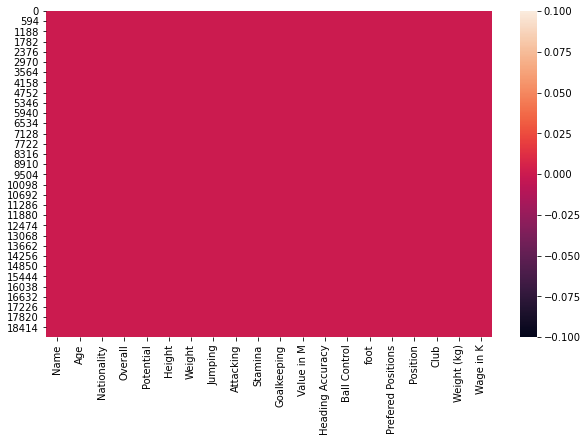

In [145]:
plt.figure(figsize=(10,6))
sns.heatmap(idf.isnull())
plt.show()

This Heatmap shows that there is no null value in the dataset.


## Heatmap to show the correlation between all the numeric Columns 

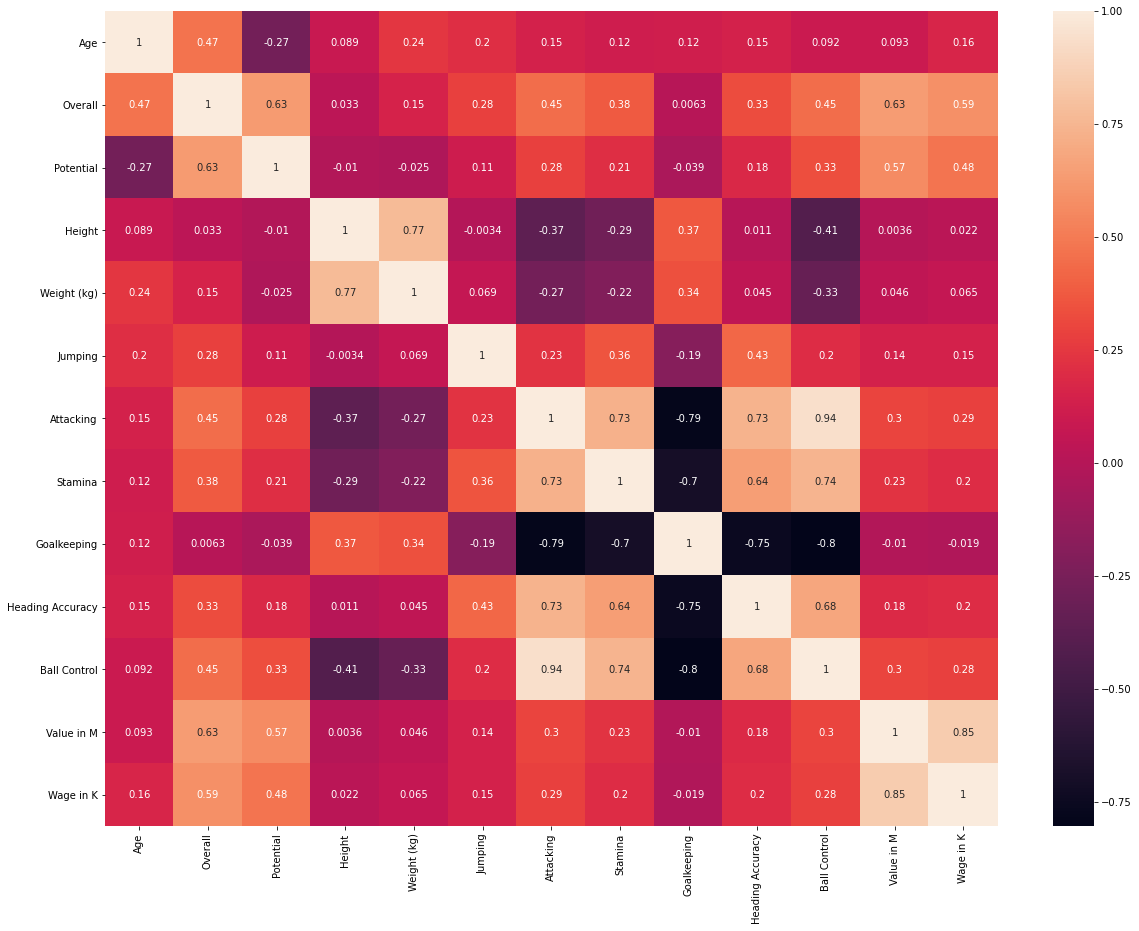

In [146]:
plt.figure(figsize=(20,15))
sns.heatmap(idf_numeric.corr(),annot = True)
plt.show()

### From the above heatmap, the conclusion is as follows:
        --> Wage is highly correlated to Value.
        --> Ball Control is highly correlated to attacking.
        --> Ball control is correlated to stamina.
        --> Ball control is correlated to heading accuracy.
        --> Heading Accuracy is correlated to attacking.
        --> Heading Accuracy is correlated to stamina.
        --> Age is directly proportional to overall rating.
        --> Overall rating is directly proportional to Value and Wage.

# Pie chart on distribution of players based on prefered positions 

In [147]:
y1 = idf['Prefered Positions'].value_counts()
y9 = idf['Prefered Positions'].unique()
px.pie(data_frame = y1,values = y1,names =y9,color = 'Prefered Positions',hover_name = 'Prefered Positions', title = 'Prefered positions of players', template = 'presentation',width =800, height = 600)


# Distribution of Players on the basis of nationality

<AxesSubplot:ylabel='Nationality'>

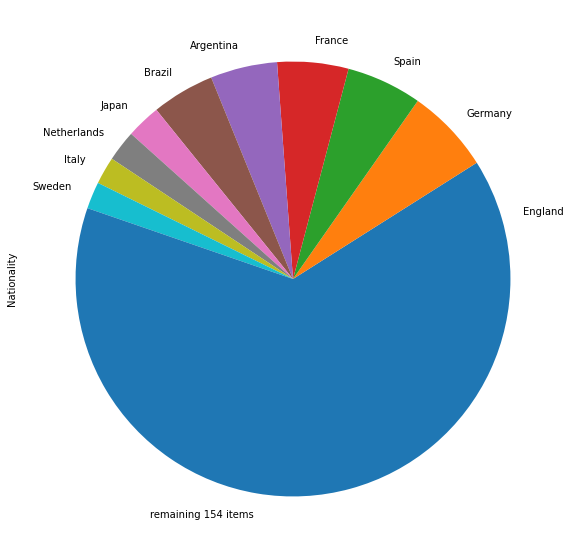

In [148]:
x4 = idf['Nationality'].unique()
plt.rc('font',size = 10)
temp = idf.Nationality.value_counts()
temp2 = temp.head(10)
if len(temp)>10:
    temp2['remaining {0} items'.format(len(temp) - 10)] = sum(temp[10:])
temp2.plot(kind='pie', figsize=(20,10))


## Top 10 Clubs 

Text(0.5, 1.0, 'Top 10 Club')

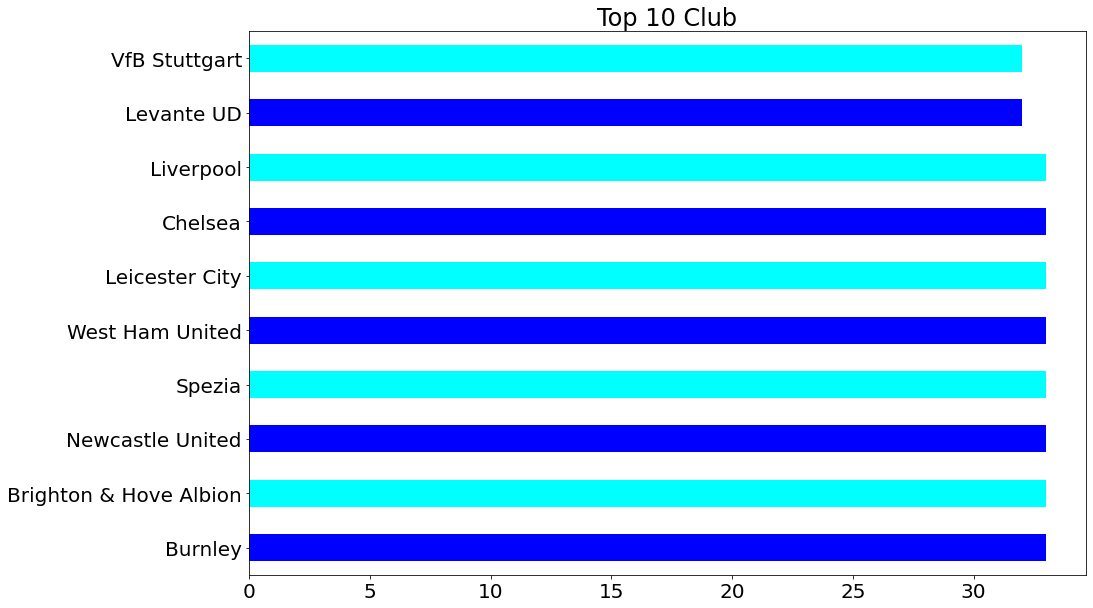

In [152]:
x3 = idf['Club'].unique()
y3 = np.array(idf['Club'].value_counts())
plt.rc('font', size=20) 
color = ('blue','#00ffff')
top_10 = idf['Club'].value_counts()[:10]
top_10.plot(kind='barh',color = color,figsize=(15,10))
plt.title('Top 10 Club')

## Pie chart on distribution of players on the basis of prefered foot

In [153]:
x = idf['foot'].unique()
y = idf['foot'].value_counts()
px.pie(data_frame = y,values = y,names =x,color = 'foot',color_discrete_sequence =['#FFDB58','#ADD8E6'],hover_name = 'foot', title = 'Preferd foot of players', template = 'presentation',width =800, height = 600)

## Distribution of age of the players

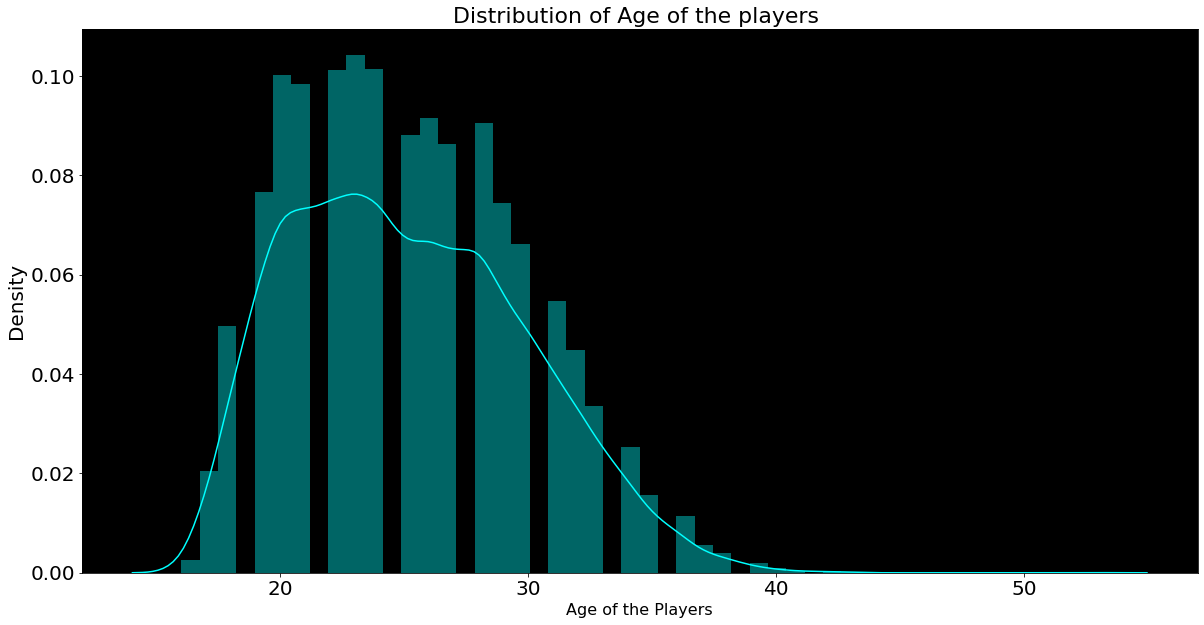

In [154]:
x = idf["Age"]
plt.figure(figsize = (20,10))
ax = plt.axes()
ax.set_facecolor("Black")
gr = sns.distplot(x,color ='#00ffff')
gr.set_xlabel(xlabel ="Age of the Players", fontsize = 16)
gr.set_title(label = "Distribution of Age of the players ", fontsize = 22)
plt.show()

## Distribution based on Age and Position

In [155]:
cd = idf[["Age","Position"]]

<AxesSubplot:xlabel='Age', ylabel='count'>

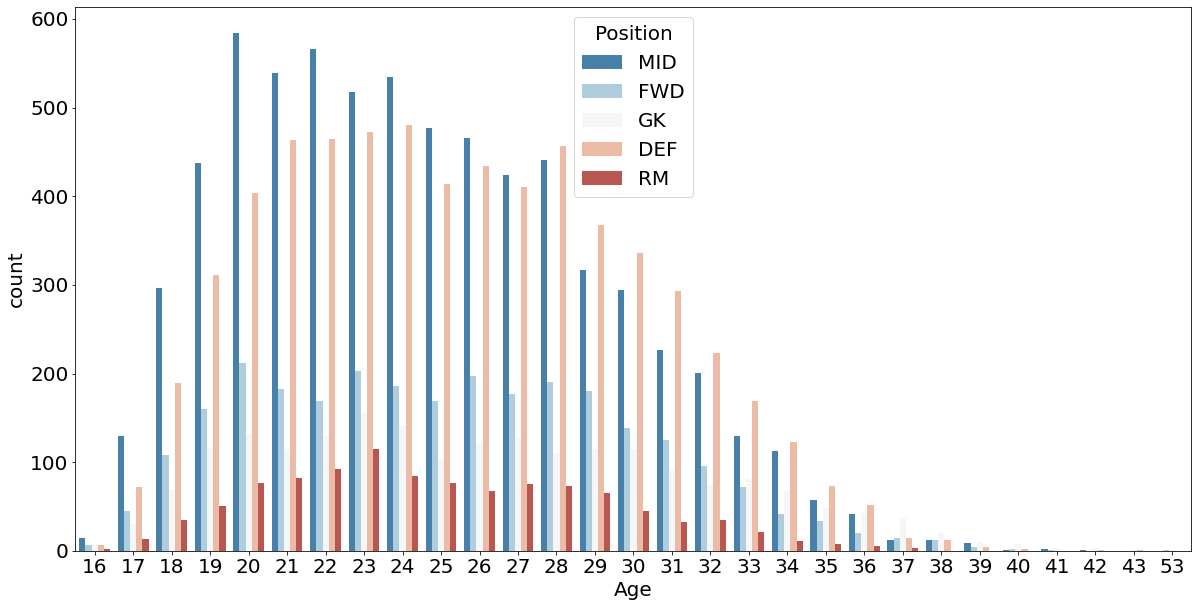

In [156]:

plt.figure(figsize = (20,10))
sns.countplot(x =idf["Age"],hue=idf["Position"],data =cd,palette="RdBu_r")

## Distribution based  on Overall Rating

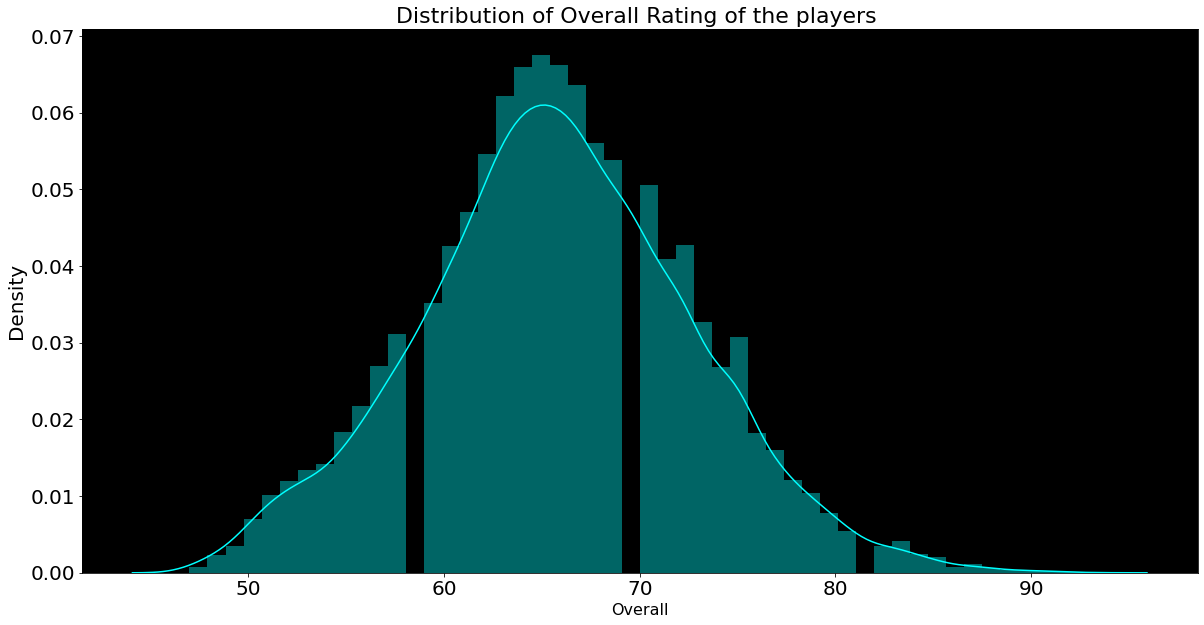

In [157]:
x = idf["Overall"]
plt.figure(figsize = (20,10))
ax = plt.axes()
ax.set_facecolor("Black")
gr = sns.distplot(x,color ='#00ffff')
gr.set_xlabel(xlabel ="Overall", fontsize = 16)
gr.set_title(label = "Distribution of Overall Rating of the players ", fontsize = 22)
plt.show()

## Distribution based on Nationality of Players

<AxesSubplot:>

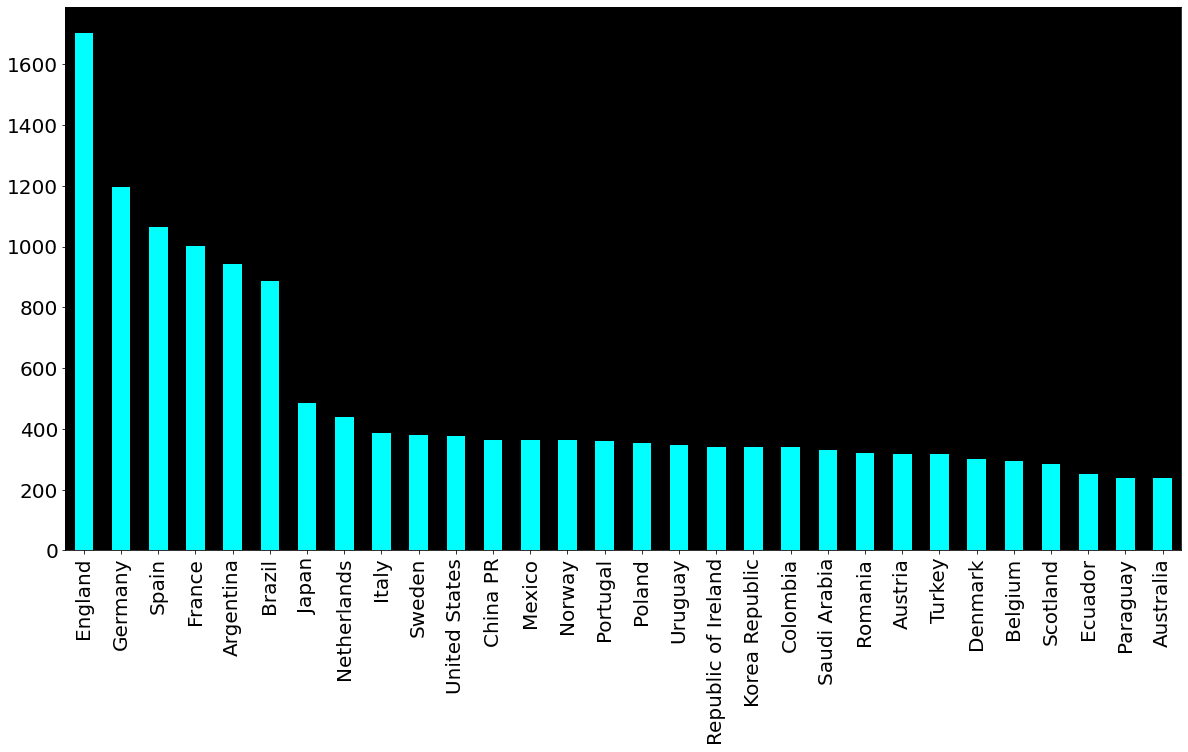

In [158]:
ax = plt.axes()
  
# Setting the background color of the plot 
# using set_facecolor() method
color = ('#00ffff')
ax.set_facecolor("Black")
idf["Nationality"].value_counts().head(30).plot(kind='bar',figsize =[20,10],color = color)

## Distribution of top 1 % Wage

In [159]:
 p = (len(idf["Wage in K"])//100)

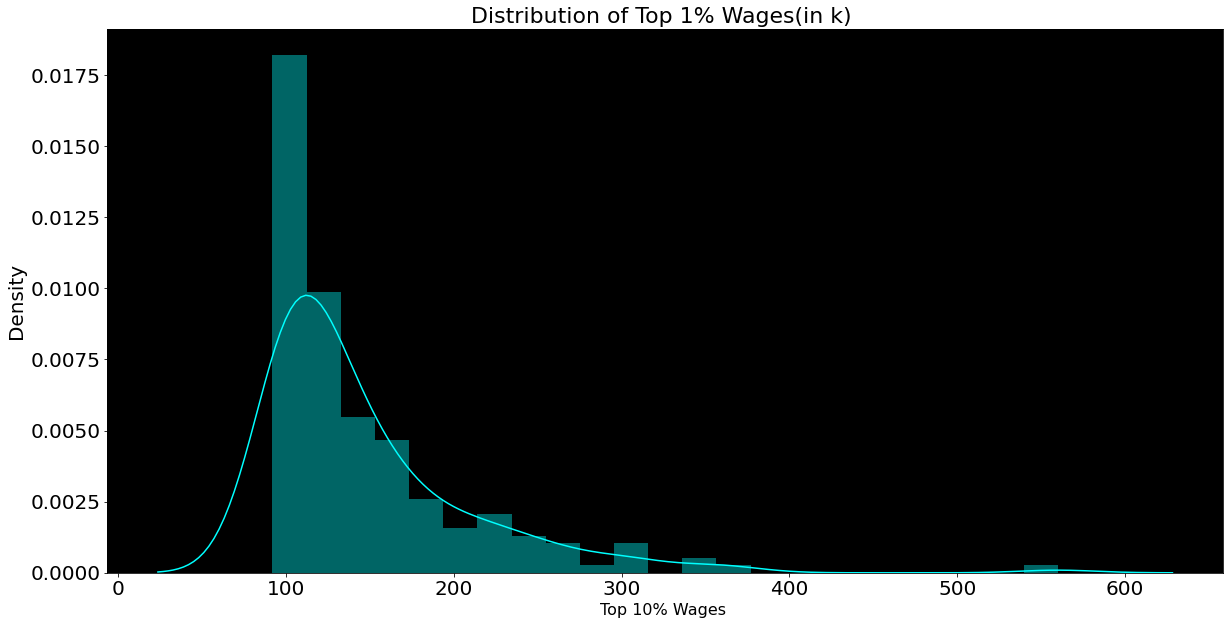

In [160]:
# top 10 percent
ten_p =idf["Wage in K"].nlargest(p)


x = ten_p
plt.figure(figsize =(20,10))
ax =  plt.axes()
ax.set_facecolor("Black")
gr = sns.distplot(x,color ='#00ffff')
gr.set_xlabel(xlabel ="Top 10% Wages ", fontsize = 16)
gr.set_title(label = "Distribution of Top 1% Wages(in k) ", fontsize = 22)
plt.show()

## Distribution of top 1% Value

In [161]:
p =len(idf["Value in M"])//100
p

189

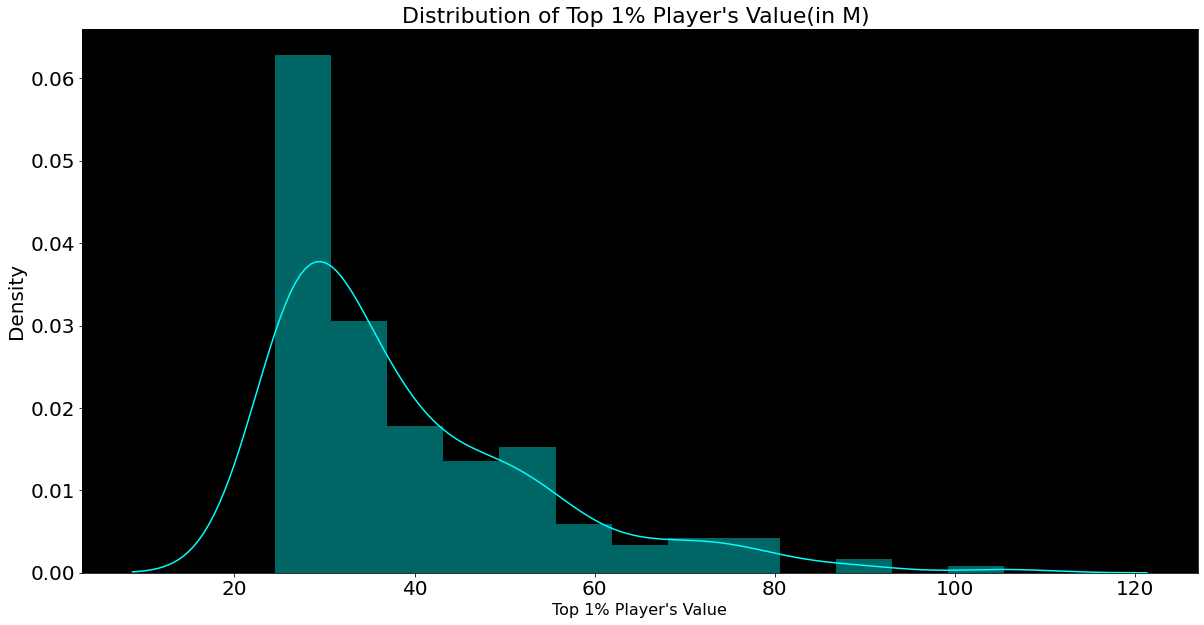

In [162]:
#top 1% of the Players Value
ten_p = idf["Value in M"].nlargest(p)


x  = ten_p
plt.figure(figsize =(20,10))
ax = plt.axes()
ax.set_facecolor("Black")
gr = sns.distplot(x,color ='#00ffff')
gr.set_xlabel(xlabel ="Top 1% Player's Value", fontsize = 16)
gr.set_title(label = "Distribution of Top 1% Player's Value(in M) ", fontsize = 22)
plt.show()

## Distribution of Height

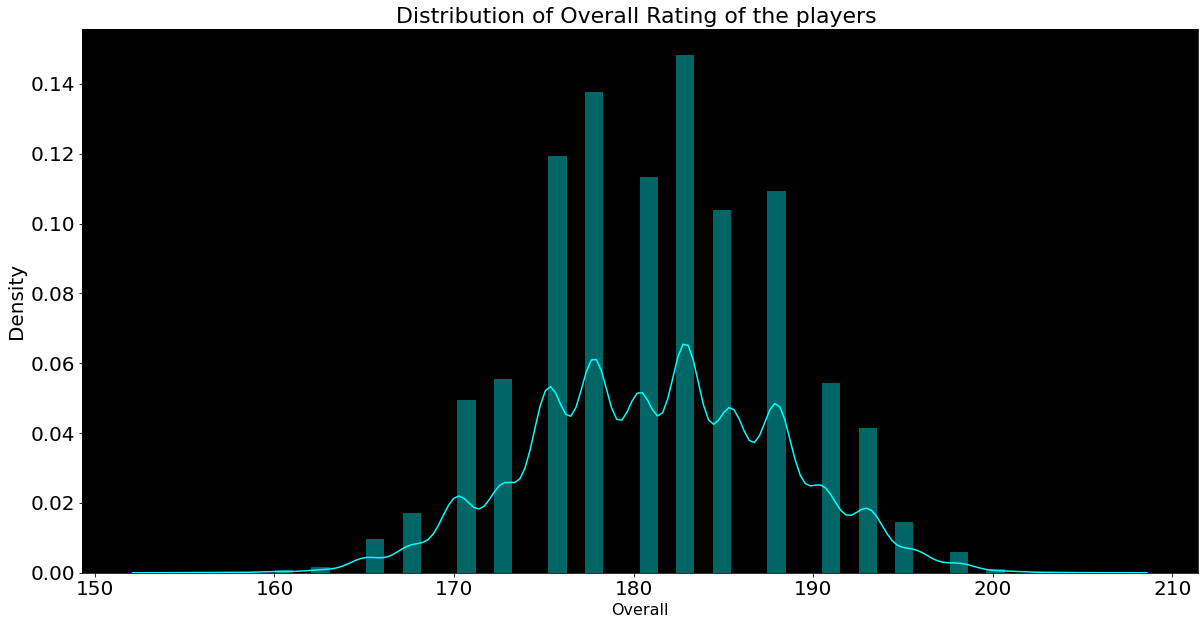

In [163]:
x = idf["Height"]
plt.figure(figsize = (20,10))
ax = plt.axes()
ax.set_facecolor("Black")
gr = sns.distplot(x,color ='#00ffff')
gr.set_xlabel(xlabel ="Overall", fontsize = 16)
gr.set_title(label = "Distribution of Overall Rating of the players ", fontsize = 22)
plt.show()

##### What is the Average Height ?


In [164]:
c = idf["Height"].mean()
print(f"The Average height of the players is {c}")


The Average height of the players is 181.22409505239418


## Distribution of Weight

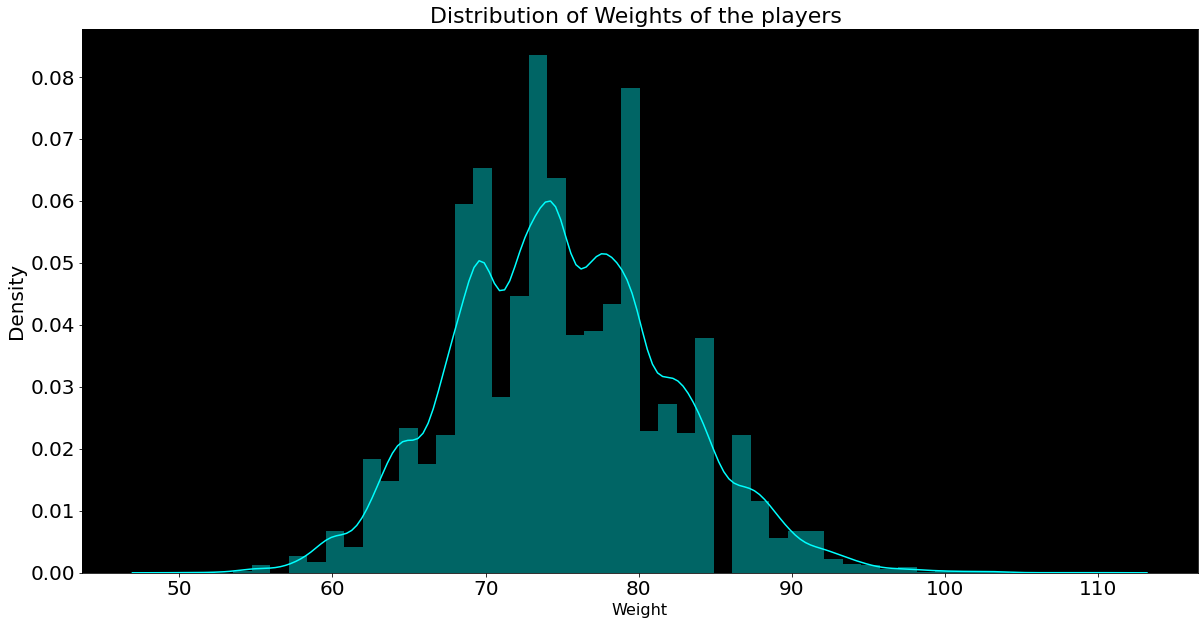

In [165]:
x = idf["Weight (kg)"]
plt.figure(figsize = (20,10))
ax = plt.axes()
ax.set_facecolor("Black")
gr = sns.distplot(x,color ='#00ffff')
gr.set_xlabel(xlabel ="Weight", fontsize = 16)
gr.set_title(label = "Distribution of Weights of the players ", fontsize = 22)
plt.show()

In [166]:
top_countries = idf[idf["Nationality"].isin (["England","Germany","Spain","France"])]

##  Boxplot for Heading Accuracy

<function matplotlib.pyplot.show(close=None, block=None)>

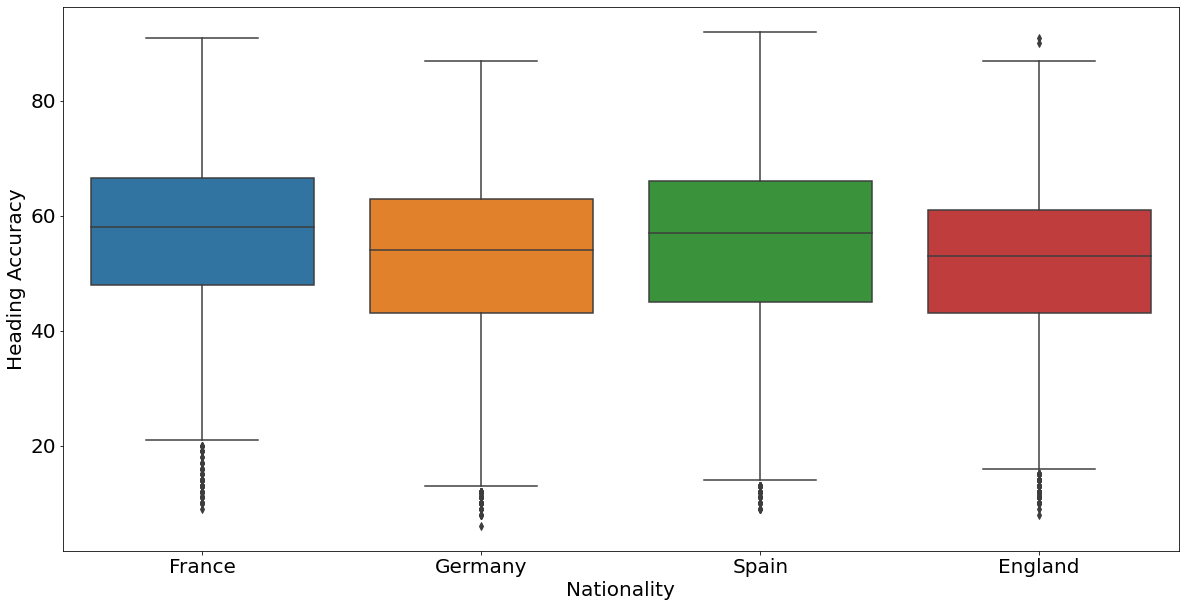

In [167]:
plt.figure(figsize =(20,10))
ax = plt.axes()
sns.boxplot(x=top_countries["Nationality"], y =top_countries["Heading Accuracy"])
plt.show

## Boxplot for Goalkeeping 

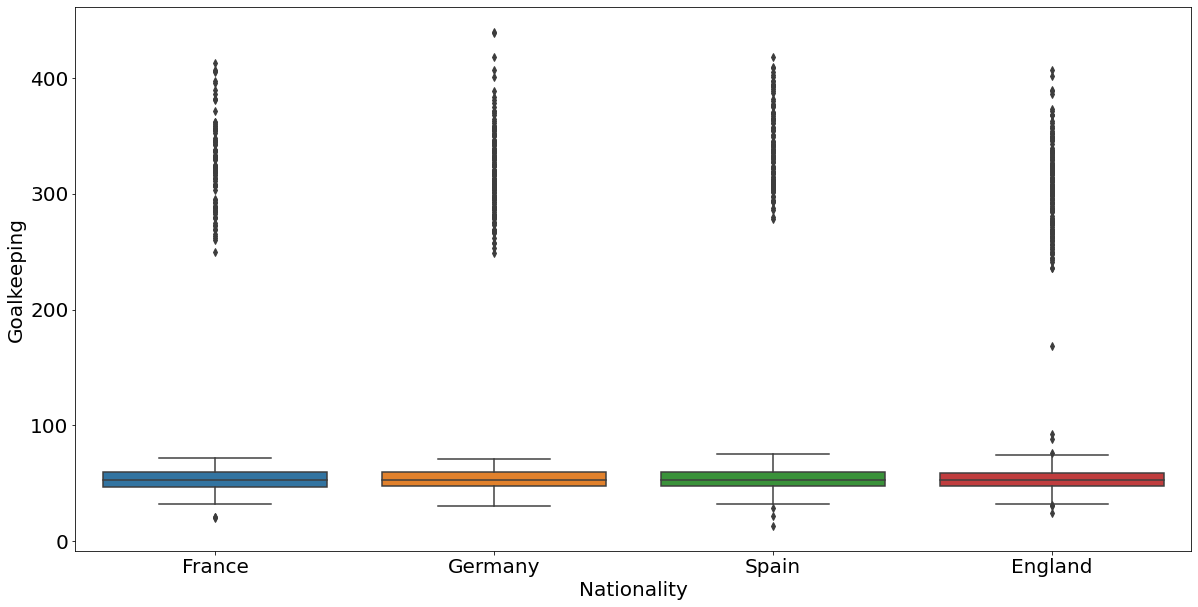

In [168]:
plt.figure(figsize= (20,10))
ax = plt.axes()
sns.boxplot(x=top_countries["Nationality"],y=top_countries["Goalkeeping"])
plt.show()

## Boxplot for Jumping

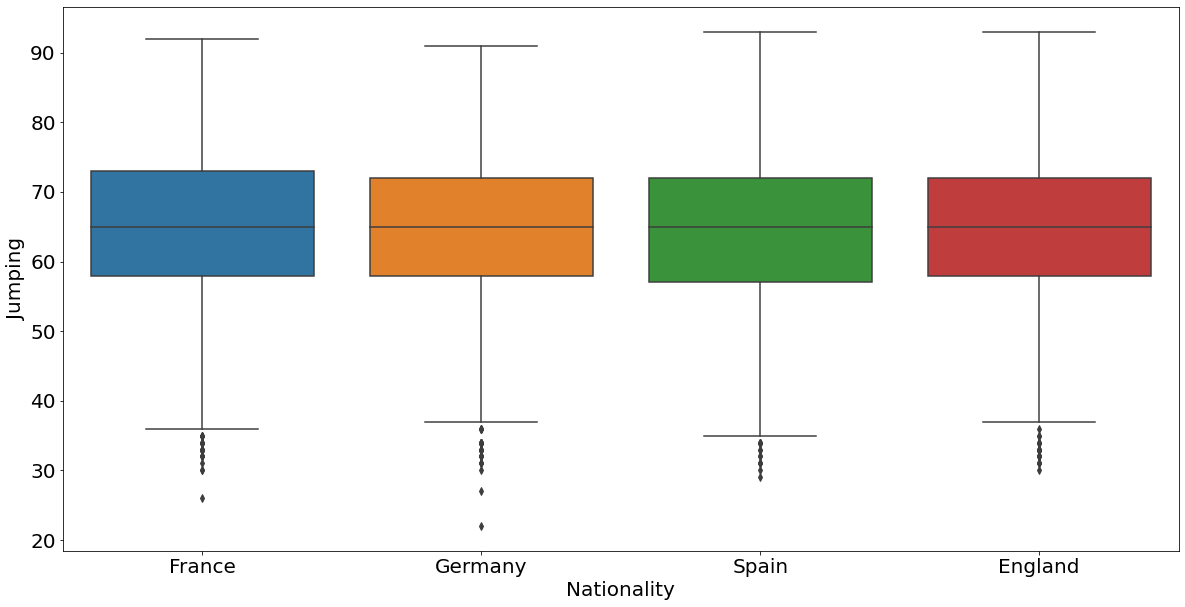

In [169]:
plt.figure(figsize = (20,10))
ax = plt.axes()
sns.boxplot(x=top_countries["Nationality"],y=top_countries["Jumping"])
plt.show()

##  Boxplot for Attacking

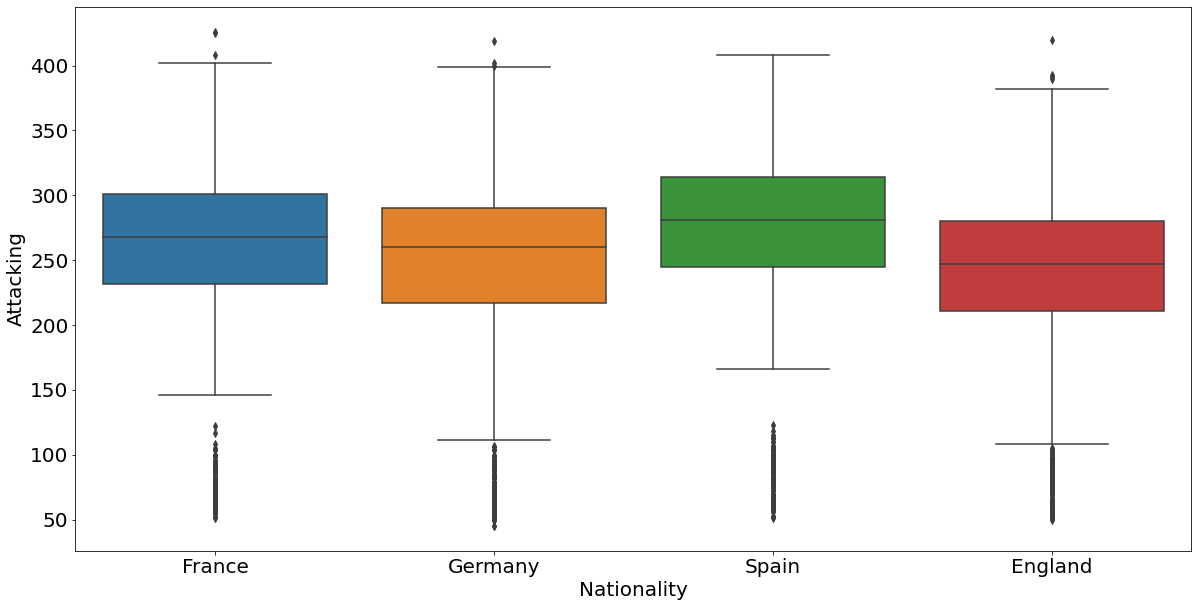

In [170]:
plt.figure(figsize = (20,10))
ax = plt.axes()
sns.boxplot(x=top_countries["Nationality"],y=top_countries["Attacking"])
plt.show()

## Boxplot for stamina

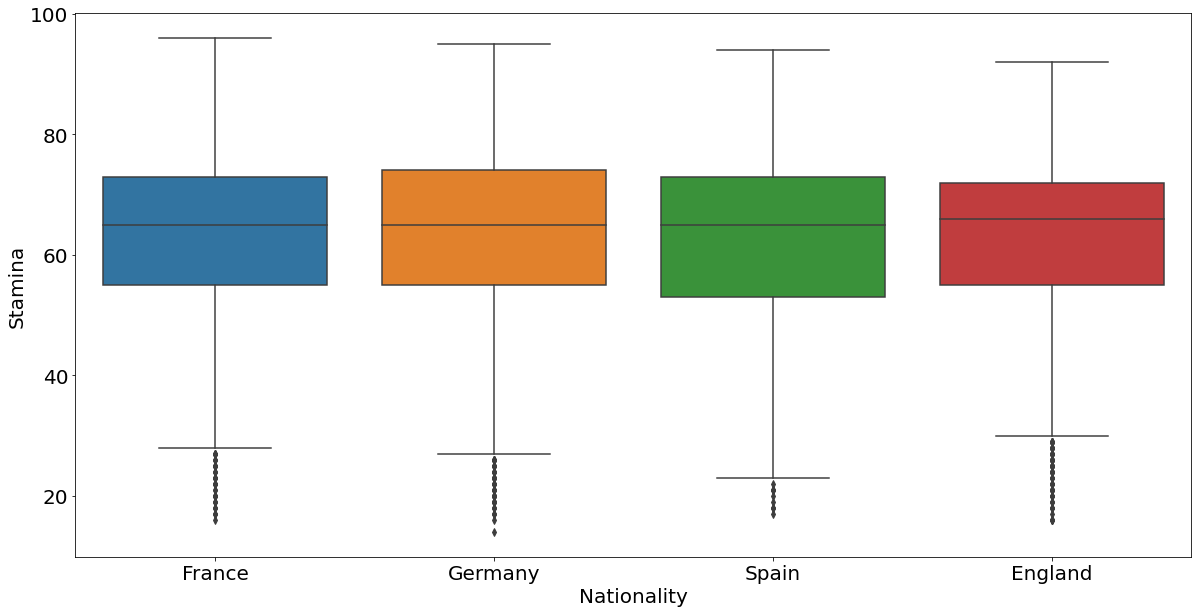

In [171]:
plt.figure(figsize = (20,10))
ax = plt.axes()
sns.boxplot(x=top_countries["Nationality"],y=top_countries["Stamina"])
plt.show()

## Overall vs Age

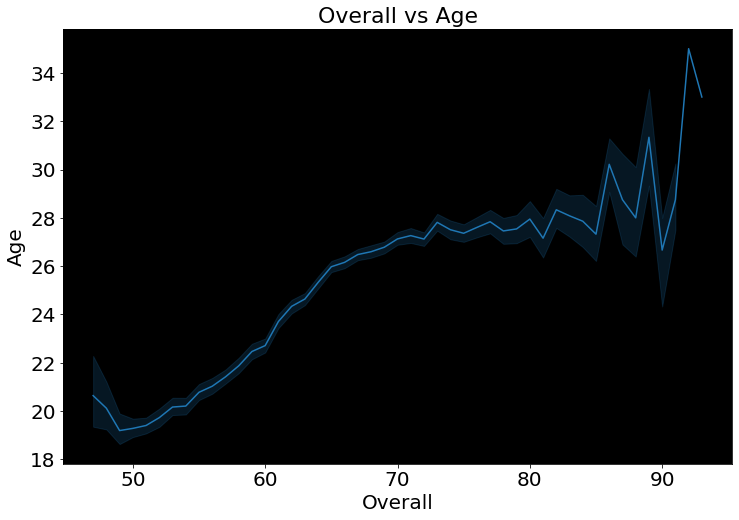

In [178]:
plt.figure(figsize=(12,8)) #comparing overall score of a person versus their age
ax = plt.axes()
ax.set_facecolor("Black")
sns.lineplot(idf['Overall'], idf['Age'], palette = "Set1")
plt.title('Overall vs Age', fontsize =22 )
plt.show()

## Potential vs Age

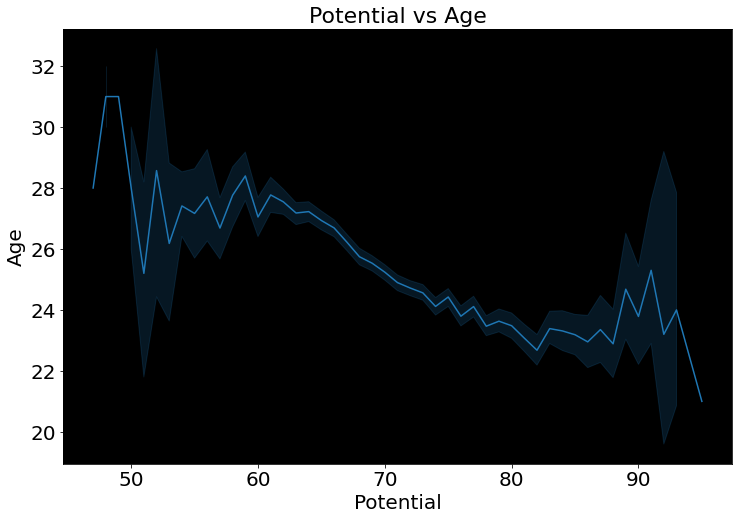

In [179]:
plt.figure(figsize=(12,8)) #comparing overall score of a person versus their age
ax = plt.axes()
ax.set_facecolor("Black")
sns.lineplot(idf['Potential'], idf['Age'], palette = "Set1")
plt.title('Potential vs Age', fontsize =22 )
plt.show()

## Value vs Age 

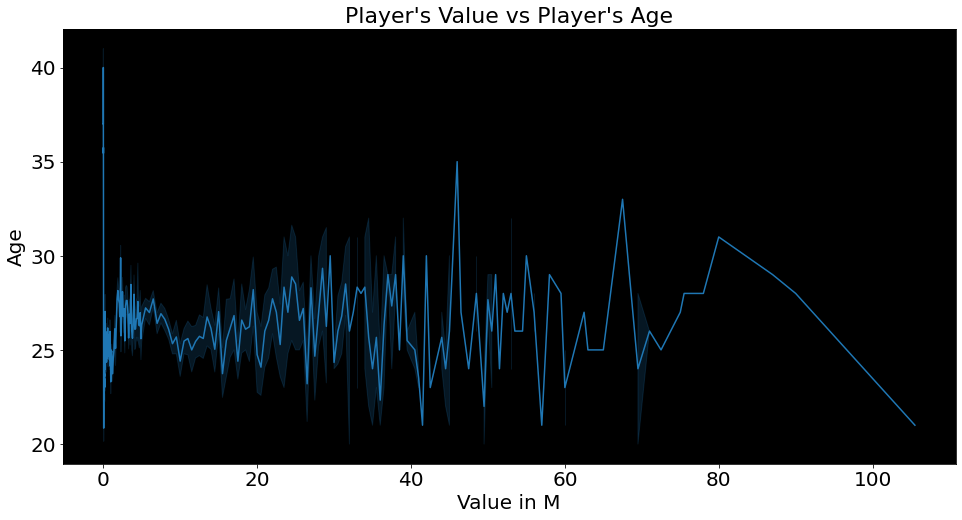

In [180]:
plt.figure(figsize=(16,8)) #comparing overall score of a person versus their age
ax = plt.axes()
ax.set_facecolor("Black")
sns.lineplot(idf['Value in M'], idf['Age'], palette = "Set1")
plt.title("Player's Value vs Player's Age", fontsize =22 )
plt.show()

## Country vs Overall Ratings

In [181]:
rating = pd.DataFrame(idf.groupby(['Nationality'])['Overall'].sum().reset_index())
count = pd.DataFrame(rating.groupby('Nationality')['Overall'].sum().reset_index())

plot = [go.Choropleth(
            colorscale = 'inferno',
            locationmode = 'country names',
            locations = count['Nationality'],
            text = count['Nationality'],
            z = count['Overall'],
)]

layout = go.Layout(title = 'Country vs Overall Ratings of players belonging to them')

fig = go.Figure(data = plot, layout = layout)
py.iplot(fig)

## Country vs Potentials

In [176]:
rating = pd.DataFrame(idf.groupby(['Nationality'])['Potential'].sum().reset_index())
count = pd.DataFrame(rating.groupby('Nationality')['Potential'].sum().reset_index())

plot = [go.Choropleth(
            colorscale = 'inferno',
            locationmode = 'country names',
            locations = count['Nationality'],
            text = count['Nationality'],
            z = count['Potential'],
)]

layout = go.Layout(title = 'Country vs Potential Ratings of players belonging to them')

fig = go.Figure(data = plot, layout = layout)
py.iplot(fig)

## No. of players from each country

In [177]:
list_of_tuples = list(zip(idf["Nationality"].value_counts().index, idf["Nationality"].value_counts().values))
country_df = pd.DataFrame(list_of_tuples,columns = ['Name', 'No. of Players'])
count = pd.DataFrame(list_of_tuples, columns = ['Name', 'No. of Players'])


plot = [go.Choropleth(
            colorscale = 'inferno',
            locationmode = 'country names',
            locations = count['Name'],
            text = count['Name'],
            z = count['No. of Players'],
)]

layout = go.Layout(title ="No. of Players from every Country")

fig = go.Figure(data = plot,layout = layout)
py.iplot(fig)